**CODE TO CLEAN AND TRANSFORM WITH COUNTVECTORIZER**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

#Open tweet data
raw_data = pd.read_csv("Political Compass Coordinates Data - iteration 1 tweet data.csv")

#Pull the tweet text
tweets_LST = raw_data['tweet translated']

#Pull the coordinate points
Xcoor_LST = raw_data['x coordinate']
Ycoor_LST = raw_data['y coordinate']

#X-Coordinate train test split
Xtweets_train, Xtweets_test, xcoor_train, xcoor_test = train_test_split(tweets_LST, Xcoor_LST, test_size = 0.2, random_state = 1)
#Y-Coordinate train test split
Ytweets_train, Ytweets_test, ycoor_train, ycoor_test = train_test_split(tweets_LST, Ycoor_LST, test_size = 0.2, random_state = 3)

#Vectorize X
vectorizer = CountVectorizer(lowercase=True, ngram_range=(1,2))
X_train = vectorizer.fit_transform(Xtweets_train.values.astype('U'))
X_test = vectorizer.transform(Xtweets_test.values.astype('U'))
#linR_modelX MAE is :  3.3098171359870276

#Vectorize Y
Y_train = vectorizer.fit_transform(Ytweets_train.values.astype('U'))
Y_test = vectorizer.transform(Ytweets_test.values.astype('U'))
#linR_modelY MAE is :  2.9701525145964913

**CODE TO CLEAN AND TRANSFORM WITH GloVe**

In [39]:
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer


words = dict()
def add_dict(d, filename):
    with open(filename, 'r') as f:
        for line in f.readlines():
            line = line.split(' ')
            try:
                d[line[0]] = np.array(line[1:], dtype=float)
            except:
                continue
add_dict(words, 'glove.6b/glove.6B.300d.txt')
tokenizer = nltk.RegexpTokenizer(r"\w+")
lemmatizer = WordNetLemmatizer()

def message_to_token(s):
    tokens = tokenizer.tokenize(s)
    lowercased_tokens = [t.lower() for t in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(t) for t in lowercased_tokens]
    useful_tokens = [t for t in lemmatized_tokens if t in words]

    return useful_tokens

def message_to_vectors(message, dataframe, word_dict=words):
    processed_list_of_tokens = message_to_token(message)
    vectors = []
    for token in processed_list_of_tokens:
        if token not in word_dict:
            continue
        token_vector = word_dict[token]
        vectors.append(token_vector)
        new_row = pd.DataFrame({'vect_tweet' :[vectors]})
    vecF = pd.concat([dataframe, new_row])
    return vecF

raw_data = pd.read_csv("Political Compass Coordinates Data - iteration 1 tweet data.csv")
tweets_LST = raw_data['tweet translated']
vecDF = pd.DataFrame()


curr_tweet = tweets_LST[0]
vecDF = message_to_vectors(curr_tweet, vecDF)
curr_tweet = tweets_LST[1]
vecDF = message_to_vectors(curr_tweet, vecDF)
vecDF.head()

,vect_tweet
0,"[[0.23323, 0.10958, 0.70567, -0.17368, -0.2055..."
0,"[[-0.44399, 0.12817, -0.25247, -0.18582, -0.16..."


**CODE TO CREATE X-AXIS LRM**

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

linR_modelX = LinearRegression()

linR_modelX.fit(X_train, xcoor_train)
y_hat_linR_X = linR_modelX.predict(X_test)

accuracy_score_linR_X = metrics.mean_absolute_error(xcoor_test, y_hat_linR_X)

print("linR_modelX MAE is : ", accuracy_score_linR_X)

linR_modelX MAE is :  3.3214016472546577


**CODE TO CREATE Y-AXIS LRM**

In [13]:
linR_modelY = LinearRegression()

linR_modelY.fit(Y_train, ycoor_train)
y_hat_linR_Y = linR_modelY.predict(Y_test)

accuracy_score_linR_Y = metrics.mean_absolute_error(ycoor_test, y_hat_linR_Y)

print("linR_modelY MAE is : ", accuracy_score_linR_Y)

linR_modelY MAE is :  2.974849833219154


**CODE TO CREATE COORDINATE PLANE**

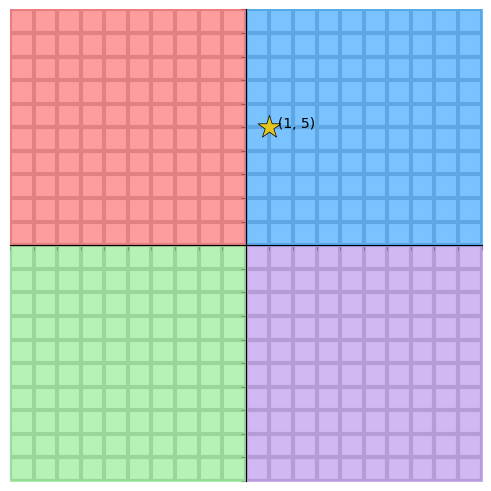

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk

#tkinter interface code to ask for twitter handle
#user_DAT = vectorizer.transform(None)
#x = linR_modelX.predict(user_DAT)
#y = linR_modelY.predict(user_DAT)
x=1
y=5
fig, ax = plt.subplots(layout='constrained')
ax.set_axisbelow(True)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.grid(visible=True, linewidth=3, color='#a1a1a1')
ax.set(xlim=(-10,10), xticks=np.arange(-10,11),
       ylim=(-10,10), yticks=np.arange(-10,11))
ax.fill_between([-10,0],-10,0,alpha=0.7, color='#98ed96') #GREEN
ax.fill_between([0,10],-10,0,alpha=0.7, color='#bf9aed') #PURPLE
ax.fill_between([-10,0],0,10,alpha=0.7, color='#fe7475') #RED
ax.fill_between([0,10],0,10,alpha=0.7, color='#42aaff') #BLUE
ax.scatter(x, y, s=300, color='#e3c51e',marker='*', linewidths=.5, edgecolors= '#000000')
ax.annotate(('  '+str((x,y))), (x,y))
ax.set_aspect('equal')
plt.xticks(visible=False)
plt.yticks(visible=False)
plt.show()
